In [1]:
## Creating XML

import os
import natsort
import glob
import cv2
import numpy as np
from scipy import io

from xml.etree.ElementTree import Element, SubElement, ElementTree
from math import *
import time

## Checking XML

from xml.etree.ElementTree import parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import os
import torch

##  Data Analysis
from xml.etree.ElementTree import parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import os


In [2]:
## Creating XML

targetDirs = ['AFW', 'AFW_Flip', 'HELEN', 'HELEN_Flip', 'IBUG', 'IBUG_Flip', 'LFPW', 'LFPW_Flip']

root = Element('dataset')
images = SubElement(root, 'images')

start_time = time.time()
for i in range(len(targetDirs)) :
    targetDir = targetDirs[i]

    imgs_dir = './300W_LP/' + targetDir + '/*.jpg'
    imgs = glob.glob(imgs_dir)
    imgs = natsort.natsorted(imgs)
    mats_dir = './300W_LP/landmarks/'+ targetDir + '/*'
    if(i%2 == 1) :
        mats_dir = './300W_LP/landmarks/'+ targetDirs[i-1] + '/*' # for flips
    mats = glob.glob(mats_dir)
    mats = natsort.natsorted(mats)
    
    # was capturing only 6 per images
    j = 0
    """
    for i in range(len(imgs)) :
        if(int(imgs[j].split('_')[-1].split('.')[0]) > 5) :
            del imgs[j]
            del mats[j]
        else :
            j = j + 1
    """     
    net = cv2.dnn.readNetFromCaffe('./openCV_models/deploy.prototxt.txt',
                               './openCV_models/res10_300x300_ssd_iter_140000.caffemodel')

    for i in range(len(imgs)) :
        img = cv2.imread(imgs[i], 1)
        (h, w) = img.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(img, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])

        (l, t, r, b) = box.astype("int")
        pts = io.loadmat(mats[i]).get('pts_3d')
        
        # Check whether it is the same face for OpenCV & groundtruth
        x1, y1 = int(pts[21][0]), int(pts[21][1]) # left eyebrow's right edge
        x2, y2 = int(pts[22][0]), int(pts[22][1]) # right eyebrow's left edge
        x = (x1+x2)/2
        y = (y1+y2)/2
        if((x < l) or (x > r) or (y < t) or (y > b)) :
            j = j + 1
            continue
                

        image = SubElement(images, 'image')
        img_name = imgs[i].split('\\')[-1]
        image.attrib['file'] = targetDir + '/' + img_name
        box = SubElement(image, 'box')
        box.attrib['top'] = str(t)
        box.attrib['left'] = str(l)
        box.attrib['width'] = str(r-l)
        box.attrib['height'] = str(b-t)

        for i in range(68) :
            part = SubElement(box, 'part')
            part.attrib['name'] = str(i).zfill(2)
            if "Flip" not in targetDir : 
                part.attrib['x'] = str(int(pts[i, 0]))
            else :
                part.attrib['x'] = str(w - int(pts[i,0]))
            part.attrib['y'] = str(int(pts[i, 1]))
            
    print(str(len(imgs) - j) + ' of ' + targetDir +' : ' + str(time.time() - start_time))
    
filename = 'labels_300W_LP_3d'
tree = ElementTree(root)
tree.write('./300W_LP/' + filename + '.xml')
#AFW : 5207
#HELEN : 37676
#IBUG : 1786
#LFPW : 16556

4985 of AFW : 152.31667518615723
3502 of AFW_Flip : 283.9299144744873
36606 of HELEN : 1400.4192552566528
25796 of HELEN_Flip : 2471.115674495697
1665 of IBUG : 2522.6045825481415
941 of IBUG_Flip : 2567.741049051285
16037 of LFPW : 3056.7309625148773
11261 of LFPW_Flip : 3488.6109278202057


In [ ]:
## Checking XML

xml_dir = './300W_LP/labels_300W_LP.xml'
tree = parse(xml_dir)
root = tree.getroot()

image_filenames = []
landmarks = []
crops = []
root_dir = './300W_LP'
for filename in root[0]:
    image_filenames.append(os.path.join(root_dir, filename.attrib['file']))

    crops.append(filename[0].attrib)

    landmark = []
    for num in range(68):
        x_coordinate = int(filename[0][num].attrib['x'])
        y_coordinate = int(filename[0][num].attrib['y'])
        landmark.append([x_coordinate, y_coordinate])
    landmarks.append(landmark)

    
landmarks = np.array(landmarks).astype('int')

In [1]:
targetDirs = ['AFW', 'AFW_Flip', 'HELEN', 'HELEN_Flip', 'IBUG', 'IBUG_Flip', 'LFPW', 'LFPW_Flip']
j = 0;
count = 0;
counts = [];
for i in range(len(image_filenames)) :
    if(image_filenames[i].split('\\')[1].split('/')[0] == targetDirs[j]):
        count = count + 1
    else :
        print(targetDirs[j] + ' : ' + str(count))
        counts.insert(j,count)
        j = j + 1
        count = 0
print(targetDirs[j] + ' : ' + str(count))
counts.insert(j,count)

NameError: name 'image_filenames' is not defined

In [73]:
print(landmarks[0][0])
print(landmarks[3][0])
print(int(np.sum(counts[0:2])))

[144 253]
[150 252]
8486


NameError: name 'randint' is not defined

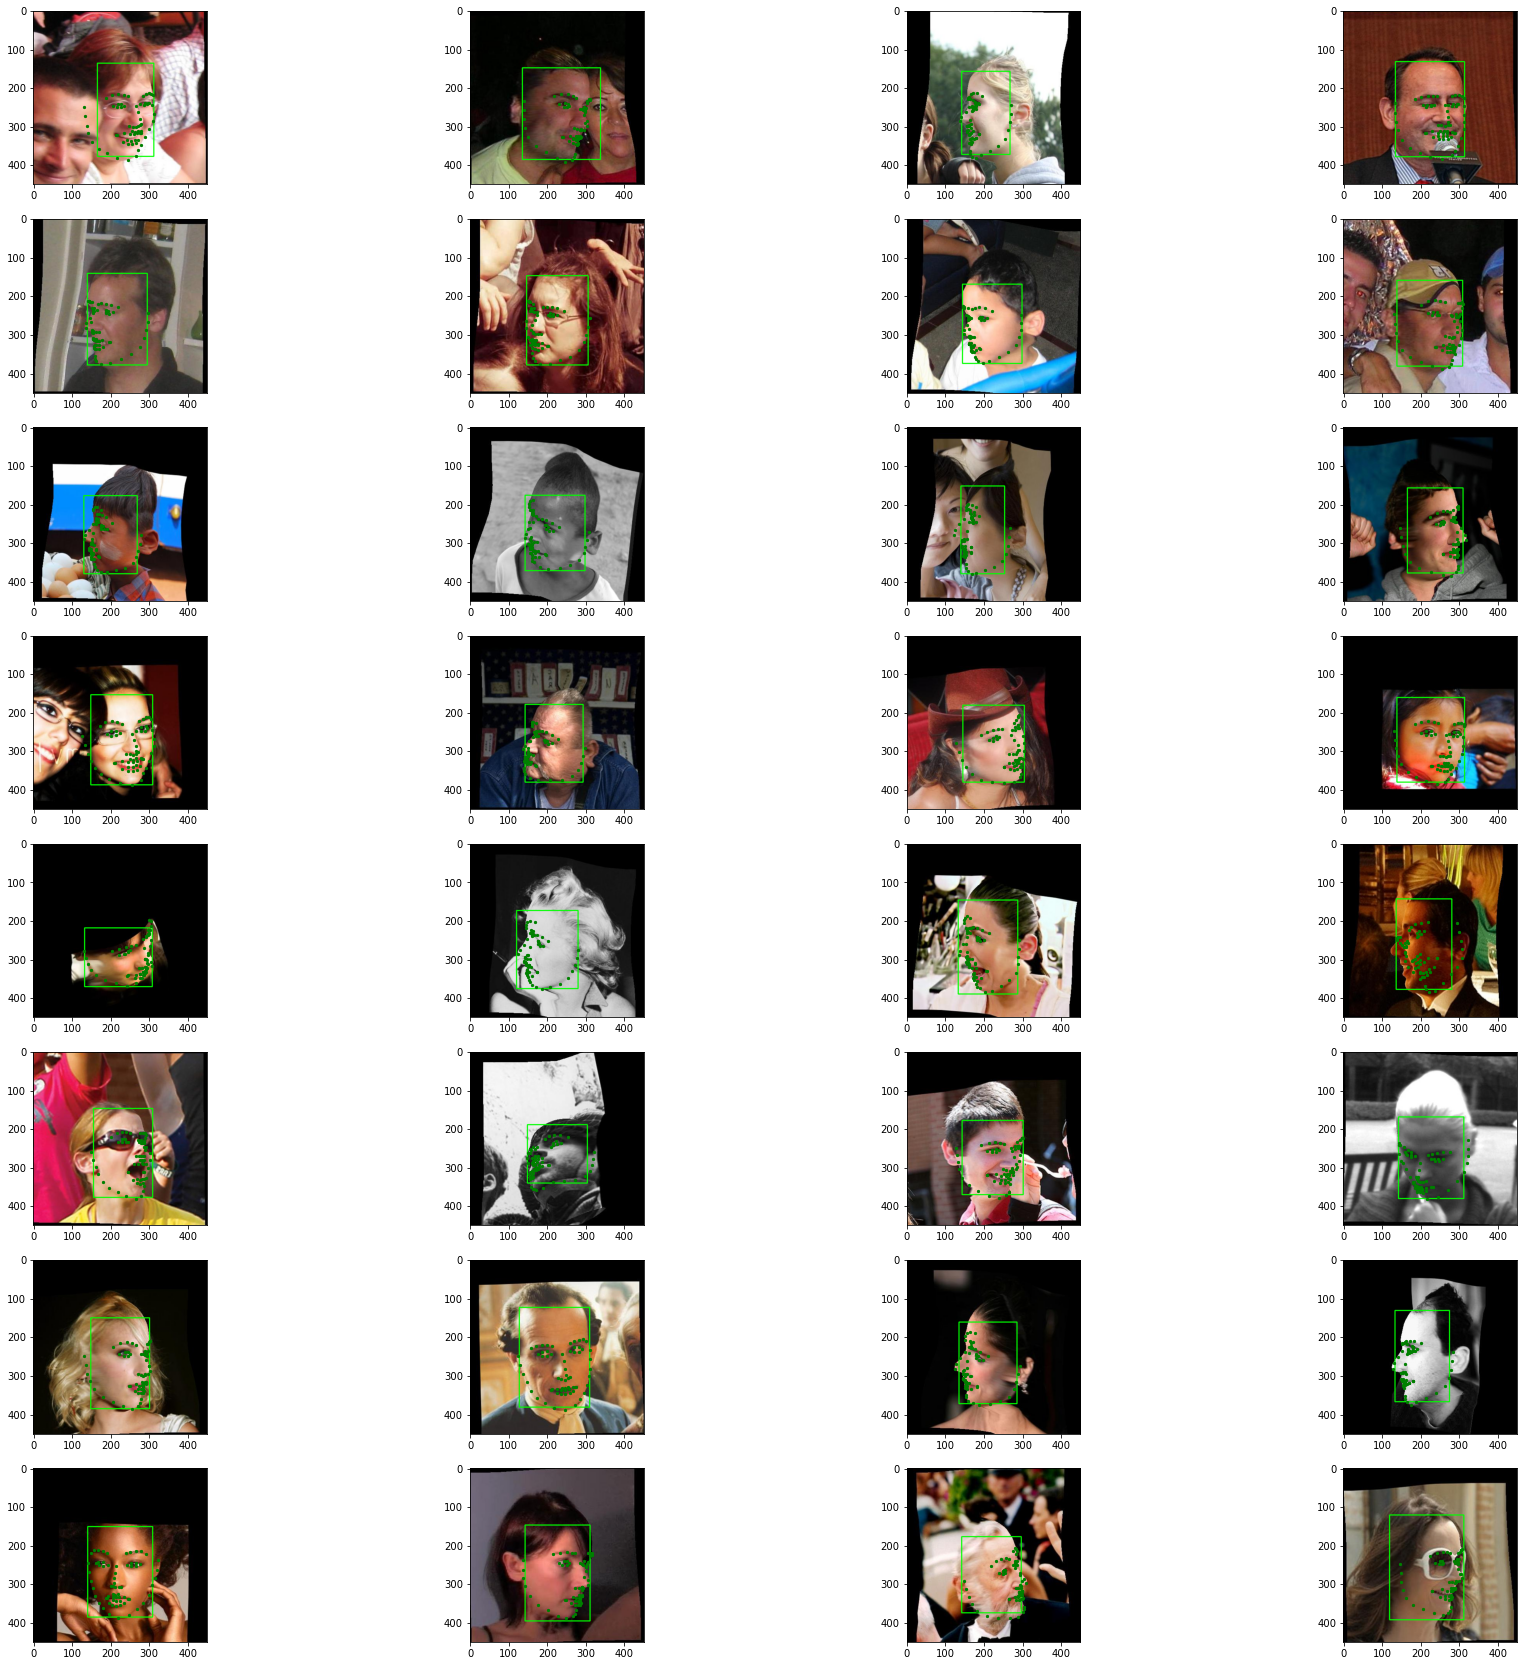

In [83]:
plt.figure(figsize=(30, 30))

for i in range(32) :
    j = floor(i/4)
    if floor(i/4)==0 :
        x = random.randint(0,np.sum(counts[0:1])-1)
    else :
        x = random.randint(np.sum(counts[0:floor(i/4)]),np.sum(counts[0:floor(i/4)+1])-1)
      
    image = cv2.imread(image_filenames[x], 1) # OpenCV use BGR, Matplotlib uses RGB
    bg_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #plt.figure(figsize=(10, 10))
    plt.subplot(8,4,i+1)
    plt.scatter(landmarks[x, : , 0], landmarks[x, : , 1], s = 5, c = 'g')
    cv2.rectangle(bg_image, (int(crops[x]['left']), int(crops[x]['top'])), 
                  (int(crops[x]['left']) + int(crops[x]['width']), int(crops[x]['top']) + int(crops[x]['height'])),(0, 255, 0), 2)
    plt.imshow(bg_image);
    #print(image_filenames[x])

In [20]:
## Checking Ommited data

targetDirs = ['AFW', 'AFW_Flip', 'HELEN', 'HELEN_Flip', 'IBUG', 'IBUG_Flip', 'LFPW', 'LFPW_Flip']

root = Element('dataset')
images = SubElement(root, 'images')

save_dir = './dlibTest'
start_time = time.time()
count = 0
for i in range(len(targetDirs)) :
    targetDir = targetDirs[i]

    imgs_dir = './300W_LP/' + targetDir + '/*.jpg'
    imgs = glob.glob(imgs_dir)
    imgs = natsort.natsorted(imgs)
    mats_dir = './300W_LP/landmarks/'+ targetDir + '/*'
    if(i%2 == 1) :
        mats_dir = './300W_LP/landmarks/'+ targetDirs[i-1] + '/*' # for flips
    mats = glob.glob(mats_dir)
    mats = natsort.natsorted(mats)
    
    # was capturing only 6 per images
    j = 0
    """
    for i in range(len(imgs)) :
        if(int(imgs[j].split('_')[-1].split('.')[0]) > 5) :
            del imgs[j]
            del mats[j]
        else :
            j = j + 1
    """     
    net = cv2.dnn.readNetFromCaffe('./openCV_models/deploy.prototxt.txt',
                               './openCV_models/res10_300x300_ssd_iter_140000.caffemodel')

    for i in range(len(imgs)) :
        img = cv2.imread(imgs[i], 1)
        (h, w) = img.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(img, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))
        net.setInput(blob)
        detections = net.forward()
        box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])

        (l, t, r, b) = box.astype("int")
        pts = io.loadmat(mats[i]).get('pts_2d')
        if "Flip" in targetDir :
            pts[:, 0] = w - pts[:, 0]
        
        # Check whether it is the same face for OpenCV & groundtruth
        x1, y1 = int(pts[21][0]), int(pts[21][1]) # left eyebrow's right edge
        x2, y2 = int(pts[22][0]), int(pts[22][1]) # right eyebrow's left edge
        x = (x1+x2)/2
        y = (y1+y2)/2
        if(((x < l) or (x > r) or (y < t) or (y > b)) and ("Flip" not in targetDir)) :
            count = count + 1
            plt.figure(figsize=(15, 15))
            plt.scatter(pts[:, 0], pts[:, 1], s = 15, c = 'g')
            cv2.rectangle(img, (l, t), (r, b),(0, 255, 0), 2)
            plt.imshow(img);
            plt.savefig(save_dir + '/' + str(count) + '.jpg')
            plt.clf()
            plt.close()
            continue
            
    print(str(count) + ' of ' + targetDir +' : ' + str(time.time() - start_time))
    
#AFW : 5207
#HELEN : 37676
#IBUG : 1786
#LFPW : 16556

222 of AFW : 255.86259269714355
222 of AFW_Flip : 435.96311473846436


KeyboardInterrupt: 

(array([2.37727628e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.51563883e-01, 7.99573104e-01, 2.71009496e-03,
        5.70546307e-04, 2.13954865e-04, 4.51682493e-04, 2.13954865e-04,
        9.50910512e-05, 4.75455256e-05, 0.00000000e+00, 0.00000000e+00,
        2.37727628e-05]),
 array([-6.34701796, -5.65996289, -4.97290782, -4.28585275, -3.59879768,
        -2.91174261, -2.22468754, -1.53763247, -0.8505774 , -0.16352233,
         0.52353274,  1.21058782,  1.89764289,  2.58469796,  3.27175303,
         3.9588081 ,  4.64586317,  5.33291824,  6.01997331,  6.70702838,
         7.39408345,  8.08113852]),
 <BarContainer object of 21 artists>)

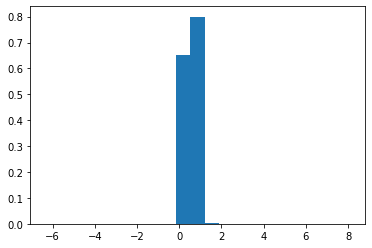

In [93]:
## Checking data of cloased eyes

targetDirs = ['afw', 'helen', 'ibug', 'lfpw']

root = Element('dataset')
images = SubElement(root, 'images')

start_time = time.time()
count = 0
vals = []
vals_raw = []
for i in range(len(targetDirs)) :
    targetDir = targetDirs[i]

    imgs_dir = './300W_LP/' + targetDir + '/*.jpg'
    imgs = glob.glob(imgs_dir)
    imgs = natsort.natsorted(imgs)
    mats_dir = './300W_LP/landmarks/'+ targetDir + '/*'
    if(i%2 == 1) :
        mats_dir = './300W_LP/landmarks/'+ targetDirs[i-1] + '/*' # for flips
    mats = glob.glob(mats_dir)
    mats = natsort.natsorted(mats)
    
    # y-direction is wrong. but will be calibrated at division
    y_l = []
    y_r = []
    for i in range(len(imgs)) :
        pts = io.loadmat(mats[i]).get('pts_2d')
        y_l = pts[37][1], pts[41][1], pts[38][1], pts[40][1]  # left eye
        y_r = pts[43][1], pts[47][1], pts[44][1], pts[46][1]  # right eye
        y_n = pts[33][1], pts[51][1] # nose tip to top of mouth
        avg = 0
        for j in range(2) :
            avg = avg - y_l[2*j] + y_l[2*j+1] - y_r[2*j] + y_r[2*j+1]
        avg = avg/4
        vals_raw.insert(i, avg)
        val = avg/(-y_n[0]+y_n[1])
        vals.insert(i,val)

plt.hist(vals,21, density=True)

(array([1.2000e+01, 4.4000e+01, 9.6000e+01, 3.8000e+02, 4.4800e+02,
        1.1040e+03, 1.4220e+03, 3.3360e+03, 6.3100e+03, 1.1274e+04,
        1.7884e+04, 2.0920e+04, 2.0194e+04, 1.8056e+04, 1.0844e+04,
        5.8040e+03, 3.1020e+03, 8.1200e+02, 2.8200e+02, 4.0000e+01,
        8.6000e+01]),
 array([ 0.65663147,  1.30927749,  1.96192351,  2.61456953,  3.26721555,
         3.91986157,  4.57250759,  5.22515361,  5.87779962,  6.53044564,
         7.18309166,  7.83573768,  8.4883837 ,  9.14102972,  9.79367574,
        10.44632176, 11.09896778, 11.7516138 , 12.40425982, 13.05690584,
        13.70955186, 14.36219788]),
 <BarContainer object of 21 artists>)

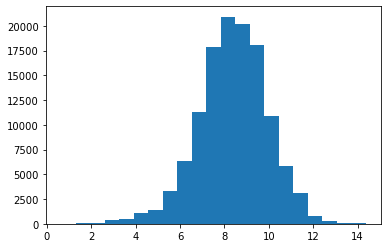

In [94]:
plt.hist(vals_raw, 21)

In [154]:
c = 0
idx = []
for i in range(len(vals)) :
    if (vals[i] < 0.4) :
        idx.insert(c, i)
        c = c+1
print(c)

14608


In [149]:
c = 0
idx = []
for i in range(len(vals)) :
    if vals_raw[i] < 6 :
        idx.insert(c, i)
        c = c+1
print(c)

7728


In [155]:
import shutil
fileDir = './closedEyes/'
y=''
for i in range(len(idx)) :
    x = ''
    for j in range(len(all_imgs[idx[i]].split('_'))-1):
        x = x + all_imgs[idx[i]].split('_')[j] + '_'
    if y == x :
        continue
    y = x
    print(all_imgs[idx[i]])
    shutil.copy(x +'0.jpg', fileDir)

./300W_LP/AFW\AFW_134212_2_3.jpg
./300W_LP/AFW\AFW_261068_1_0.jpg
./300W_LP/AFW\AFW_261068_2_0.jpg
./300W_LP/AFW\AFW_3989161_1_11.jpg
./300W_LP/AFW\AFW_4821642_1_0.jpg
./300W_LP/AFW\AFW_24795717_2_13.jpg
./300W_LP/AFW\AFW_24795717_3_0.jpg
./300W_LP/AFW\AFW_79378097_5_7.jpg
./300W_LP/AFW\AFW_90800092_1_13.jpg
./300W_LP/AFW\AFW_90800092_2_0.jpg
./300W_LP/AFW\AFW_111076519_1_11.jpg
./300W_LP/AFW\AFW_111076519_2_0.jpg
./300W_LP/AFW\AFW_199759840_1_8.jpg
./300W_LP/AFW\AFW_213654866_1_0.jpg
./300W_LP/AFW\AFW_270814102_1_7.jpg
./300W_LP/AFW\AFW_270814102_2_0.jpg
./300W_LP/AFW\AFW_281972218_1_0.jpg
./300W_LP/AFW\AFW_281972218_2_0.jpg
./300W_LP/AFW\AFW_410225851_1_14.jpg
./300W_LP/AFW\AFW_437595409_1_0.jpg
./300W_LP/AFW\AFW_1051618982_1_0.jpg
./300W_LP/AFW\AFW_1130084326_1_0.jpg
./300W_LP/AFW\AFW_1130084326_2_0.jpg
./300W_LP/AFW\AFW_1295311477_1_4.jpg
./300W_LP/AFW\AFW_1372188757_1_0.jpg
./300W_LP/AFW\AFW_1648807314_3_7.jpg
./300W_LP/AFW\AFW_1814664578_1_0.jpg
./300W_LP/AFW\AFW_2060241469_1_9.j

./300W_LP/HELEN\HELEN_2091477588_1_0.jpg
./300W_LP/HELEN\HELEN_2091990193_1_7.jpg
./300W_LP/HELEN\HELEN_2092281650_1_0.jpg
./300W_LP/HELEN\HELEN_2115342511_1_9.jpg
./300W_LP/HELEN\HELEN_2115806866_1_0.jpg
./300W_LP/HELEN\HELEN_2115806866_2_4.jpg
./300W_LP/HELEN\HELEN_2115806866_3_0.jpg
./300W_LP/HELEN\HELEN_2116626844_2_5.jpg
./300W_LP/HELEN\HELEN_2118321955_1_1.jpg
./300W_LP/HELEN\HELEN_2118601275_1_14.jpg
./300W_LP/HELEN\HELEN_2124708927_1_13.jpg
./300W_LP/HELEN\HELEN_2124851274_1_0.jpg
./300W_LP/HELEN\HELEN_2130531101_1_9.jpg
./300W_LP/HELEN\HELEN_2134232899_1_0.jpg
./300W_LP/HELEN\HELEN_2134262703_1_5.jpg
./300W_LP/HELEN\HELEN_2139767101_1_17.jpg
./300W_LP/HELEN\HELEN_2139767101_2_0.jpg
./300W_LP/HELEN\HELEN_2139831977_2_11.jpg
./300W_LP/HELEN\HELEN_2140513376_1_0.jpg
./300W_LP/HELEN\HELEN_2150058510_1_3.jpg
./300W_LP/HELEN\HELEN_2151607444_1_0.jpg
./300W_LP/HELEN\HELEN_2163747900_1_1.jpg
./300W_LP/HELEN\HELEN_2163829312_1_0.jpg
./300W_LP/HELEN\HELEN_2164847927_1_6.jpg
./300W_LP/HE

./300W_LP/HELEN\HELEN_2993039649_1_0.jpg
./300W_LP/HELEN\HELEN_3004338997_1_10.jpg
./300W_LP/HELEN\HELEN_3005087184_1_0.jpg
./300W_LP/HELEN\HELEN_3005381551_1_0.jpg
./300W_LP/HELEN\HELEN_3006104548_1_0.jpg
./300W_LP/HELEN\HELEN_3026147764_1_13.jpg
./300W_LP/HELEN\HELEN_3026829129_1_0.jpg
./300W_LP/HELEN\HELEN_3029583659_1_9.jpg
./300W_LP/HELEN\HELEN_3029583859_1_0.jpg
./300W_LP/HELEN\HELEN_3036934213_1_8.jpg
./300W_LP/HELEN\HELEN_3049915594_1_13.jpg
./300W_LP/HELEN\HELEN_3050267766_1_0.jpg
./300W_LP/HELEN\HELEN_3052865023_5_10.jpg
./300W_LP/HELEN\HELEN_3057639344_1_6.jpg
./300W_LP/HELEN\HELEN_3066109411_1_12.jpg
./300W_LP/HELEN\HELEN_3066644361_1_0.jpg
./300W_LP/HELEN\HELEN_3071120472_1_16.jpg
./300W_LP/HELEN\HELEN_3071550860_1_0.jpg
./300W_LP/HELEN\HELEN_3078332786_1_5.jpg
./300W_LP/HELEN\HELEN_3079176108_1_0.jpg
./300W_LP/HELEN\HELEN_3080740886_1_2.jpg
./300W_LP/HELEN\HELEN_3081187199_1_0.jpg
./300W_LP/HELEN\HELEN_3159679449_1_4.jpg
./300W_LP/HELEN\HELEN_3160369021_1_0.jpg
./300W_LP/

./300W_LP/HELEN_Flip\HELEN_2100608030_2_0.jpg
./300W_LP/HELEN_Flip\HELEN_2102458056_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2103921848_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2106008703_1_8.jpg
./300W_LP/HELEN_Flip\HELEN_2115806866_3_10.jpg
./300W_LP/HELEN_Flip\HELEN_2116626844_2_0.jpg
./300W_LP/HELEN_Flip\HELEN_2117134810_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2118321955_1_8.jpg
./300W_LP/HELEN_Flip\HELEN_2118601275_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2124608043_1_1.jpg
./300W_LP/HELEN_Flip\HELEN_2124611787_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2125387076_1_13.jpg
./300W_LP/HELEN_Flip\HELEN_2125467698_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2135034002_1_12.jpg
./300W_LP/HELEN_Flip\HELEN_2135432270_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2139626906_1_17.jpg
./300W_LP/HELEN_Flip\HELEN_2139633946_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2139767101_1_5.jpg
./300W_LP/HELEN_Flip\HELEN_2139831977_2_0.jpg
./300W_LP/HELEN_Flip\HELEN_2140513376_1_0.jpg
./300W_LP/HELEN_Flip\HELEN_2140556694_1_4.jpg
./300W_LP/HELEN_Flip\HELEN_214

./300W_LP/LFPW\LFPW_image_test_0032_0.jpg
./300W_LP/LFPW\LFPW_image_test_0033_0.jpg
./300W_LP/LFPW\LFPW_image_test_0034_3.jpg
./300W_LP/LFPW\LFPW_image_test_0035_0.jpg
./300W_LP/LFPW\LFPW_image_test_0050_9.jpg
./300W_LP/LFPW\LFPW_image_test_0051_0.jpg
./300W_LP/LFPW\LFPW_image_test_0052_0.jpg
./300W_LP/LFPW\LFPW_image_test_0053_0.jpg
./300W_LP/LFPW\LFPW_image_test_0060_9.jpg
./300W_LP/LFPW\LFPW_image_test_0061_0.jpg
./300W_LP/LFPW\LFPW_image_test_0063_0.jpg
./300W_LP/LFPW\LFPW_image_test_0076_12.jpg
./300W_LP/LFPW\LFPW_image_test_0105_8.jpg
./300W_LP/LFPW\LFPW_image_test_0106_0.jpg
./300W_LP/LFPW\LFPW_image_test_0110_4.jpg
./300W_LP/LFPW\LFPW_image_test_0111_0.jpg
./300W_LP/LFPW\LFPW_image_test_0117_5.jpg
./300W_LP/LFPW\LFPW_image_test_0118_0.jpg
./300W_LP/LFPW\LFPW_image_test_0120_12.jpg
./300W_LP/LFPW\LFPW_image_test_0121_0.jpg
./300W_LP/LFPW\LFPW_image_test_0136_14.jpg
./300W_LP/LFPW\LFPW_image_test_0137_0.jpg
./300W_LP/LFPW\LFPW_image_test_0154_7.jpg
./300W_LP/LFPW\LFPW_image_test_

./300W_LP/LFPW_Flip\LFPW_image_train_0344_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0345_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0346_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0351_14.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0352_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0353_9.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0354_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0362_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0363_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0364_4.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0371_1.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0373_11.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0374_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0381_16.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0382_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0383_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0384_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0386_3.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0389_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0390_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_

./300W_LP/LFPW_Flip\LFPW_image_train_0833_12.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0834_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0836_8.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0837_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0844_4.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0845_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0861_15.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0862_0.jpg
./300W_LP/LFPW_Flip\LFPW_image_train_0865_0.jpg


In [140]:
targetDirs = ['AFW', 'AFW_Flip', 'HELEN', 'HELEN_Flip', 'IBUG', 'IBUG_Flip', 'LFPW', 'LFPW_Flip']

root = Element('dataset')
images = SubElement(root, 'images')

start_time = time.time()
count = 0
all_imgs = []
for i in range(len(targetDirs)) :
    targetDir = targetDirs[i]

    imgs_dir = './300W_LP/' + targetDir + '/*.jpg'
    all_imgs = np.concatenate([all_imgs, natsort.natsorted(glob.glob(imgs_dir))])

In [133]:
x = ''
for j in range(len(all_imgs[idx[i]].split('_'))-1):
    x = x + all_imgs[idx[i]].split('_')[j]
    #if y == x :
    #    continue
    #y = x
print(x)

./300WLP/AFW\AFW1110765191
